# Conexão com postgres e Relatorios do Sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [ ]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

### Importando bibliotecas

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import numpy as np

### Usando psycopg2 para configurar conexão

In [5]:
conn = psycopg2.connect(host="motty.db.elephantsql.com",database="aqdnwobk", user="aqdnwobk", password="HI-ek-MnD7BDYGFKTQQ9pnDB5UJhQX8a")

# Relatórios

## Relatório 1
### Objetivo: Obter relatório que mostre qual tipo de contato (email ou telefone) é mais usado e a quantidade de contatos de cada tipo.
Código para obtenção do resultado:

In [6]:
consulta = pd.read_sql_query("""
                              SELECT tipo_contato, COUNT(*) as quantidade 
                              FROM contato GROUP BY tipo_contato
                            """,conn)
consulta

,tipo_contato,quantidade
0,telefone,22
1,email,28


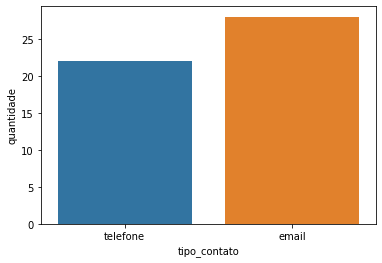

In [7]:
sns.barplot (x = 'tipo_contato', y = 'quantidade', data = consulta)

# =======================================================================
## Relatório 2
### Objetivo: Obter relatório que mostre quantos funcionários existem em cada cargo
Código para obtenção do resultado:

In [ ]:
consulta = pd.read_sql_query("""
                              SELECT tipo_funcionario as cargo, COUNT(*) as quantidade
                              FROM funcionario GROUP BY tipo_funcionario
                            """,conn)
consulta

,cargo,quantidade
0,Médico,7
1,Enfermeiro,9
2,Atendente,4
3,Faxineira,5


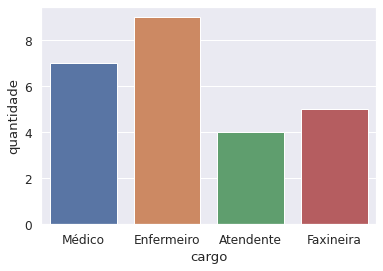

In [ ]:
sns.set(font_scale=1.1)
sns.barplot (x = 'cargo', y = 'quantidade', data = consulta)

# ============================================================
## Relatório 3
### Objetivo: Obter relatório que mostre a carga horária média de cada cargo.
Código para obtenção do resultado:

In [ ]:
consulta = pd.read_sql_query("""
                              SELECT tipo_funcionario as cargo, AVG(carga_horaria) as media
                              FROM funcionario GROUP BY tipo_funcionario
                            """,conn)
consulta

,cargo,media
0,Médico,11.142857
1,Enfermeiro,9.111111
2,Atendente,8.500000
3,Faxineira,8.000000


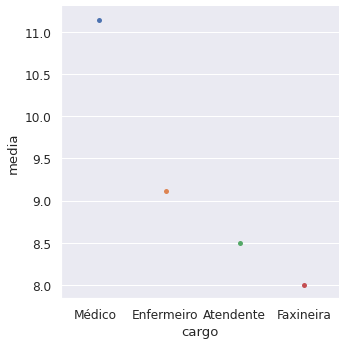

In [ ]:
sns.catplot(x="cargo", y="media", data=consulta);

# =======================================================================
## Relatório 4
### Objetivo: Obter relatório que mostre de forma decrescente a quantidade de exames que cada médico está associado.
Código para obtenção do resultado:

In [ ]:
consulta = pd.read_sql_query("""
                              SELECT pessoa.nome_pessoa, COUNT(*) as quantidade FROM funcionario 
                              INNER JOIN exame ON (exame.id_funcionario = funcionario.id_funcionario) 
                              INNER JOIN pessoa ON (funcionario.id_pessoa = pessoa.id_pessoa) 
                              GROUP BY pessoa.nome_pessoa ORDER BY quantidade DESC
                            """,conn)
consulta

,nome_pessoa,quantidade
0,Mariah,5
1,Larissa,4
2,Alfredo,4
3,Mathias,4
4,Laís,3
5,Theo,2
6,Rian,2
7,Alfredonho,1


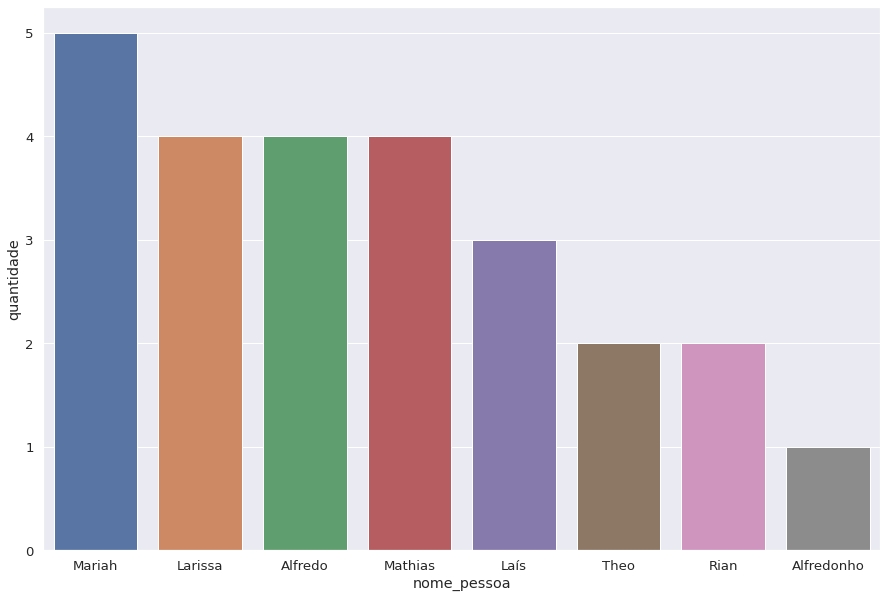

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.barplot (x = 'nome_pessoa', y = 'quantidade', data = consulta)

# =======================================================================
## Relatório 5
### Objetivo: Obter relatório que mostre quando exames temos na categoria SANGUE e COVID.
Código para obtenção do resultado:

In [9]:
consulta = pd.read_sql_query("""
                              SELECT tipo_exame, count(tipo_exame) as quantidade FROM exame GROUP BY tipo_exame
                            """,conn)
consulta

,tipo_exame,quantidade
0,COVID,15
1,SANGUE,10


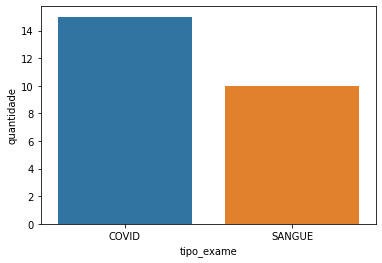

In [10]:
sns.barplot (x = 'tipo_exame', y = 'quantidade', data = consulta)
